In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# scoring data
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('market.csv' )

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# Obtener el resumen estadístico de todas las columnas de "df"
df.describe(include = "all")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Ciudad': ['Ciudad1', 'Ciudad2', 'Ciudad1', 'Ciudad2', 'Ciudad3'],
    'Genero': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre'],
    'TipoCompra': ['Electrónicos', 'Ropa', 'Electrónicos', 'Ropa', 'Electrónicos'],
    'Monto': [100, 150, 200, 120, 180]
}


In [8]:
df1 =  df.groupby(['City','Gender'])['Product line'].sum().reset_index
print(df1)

<bound method Series.reset_index of City       Gender
Mandalay   Female    Food and beveragesFashion accessoriesSports an...
           Male      Electronic accessoriesHealth and beautyHome an...
Naypyitaw  Female    Electronic accessoriesHome and lifestyleFood a...
           Male      Electronic accessoriesElectronic accessoriesHo...
Yangon     Female    Health and beautyElectronic accessoriesHealth ...
           Male      Home and lifestyleHealth and beautySports and ...
Name: Product line, dtype: object>


In [9]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [12]:
df['City'] = df['City'].replace({"Yangon": 0, "Naypyitaw": 1, "Mandalay": 2})
df['City'] = df['City'].astype(int)

In [13]:
df['Gender'] = df['Gender'].replace({"Female": 0, "Male": 1})
df['CiGender'] = df['Gender'].astype(int)

In [14]:
df['Product line'] = df['Product line'].replace({"Health and beauty": 0, "Electronic accessories": 1, "Home and lifestyle": 2, "Sports and travel":3, "Food and beverages": 4, "Fashion accessories":5})
df['Product line'] = df['Product line'].astype(int)

In [15]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df[["City", "Gender"]]
y = df['Product line']

In [16]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.13


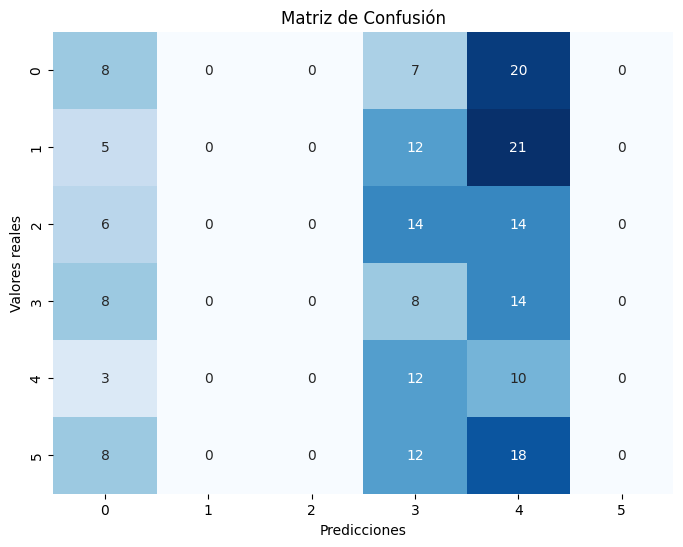


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.21      0.23      0.22        35
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        34
           3       0.12      0.27      0.17        30
           4       0.10      0.40      0.16        25
           5       0.00      0.00      0.00        38

    accuracy                           0.13       200
   macro avg       0.07      0.15      0.09       200
weighted avg       0.07      0.13      0.08       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [18]:
#The data spliting is executed here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# Data gets scaled >> Classification of decission tree
pipe = Pipeline([('pca', PCA(n_components = 2)),('std', StandardScaler()), ('decision_tree', RandomForestClassifier(random_state=42))], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)


print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.3s
0.172
